<a href="https://colab.research.google.com/github/Devesh1602/Deep-Learning-BE/blob/main/Devesh_boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset-https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv("housingdata.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [5]:
df.fillna(df.mean(),inplace=True)

In [7]:
#features (x) and the target variable (y).
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #Alternative StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape) # .shape is usually used to get the current shape of an array

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [10]:
x_train_scaled[0]

array([0.21581068, 0.        , 0.64662757, 0.        , 0.58847737,
       0.57175704, 0.9907312 , 0.03542817, 1.        , 0.91412214,
       0.80851064, 1.        , 0.5339404 ])

In [11]:
x_train_scaled[0].shape

(13,)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

 #Activation alternative ReLU (Rectified Linear Unit), sigmoid, tanh, and softmax.
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1)) #output layer
model.compile(optimizer='adam',loss='mse',metrics=['mae']) #compilation
#optimiser alternative RMSprop


In [15]:
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
354/354 [==============================] - 3s 4ms/step - loss: 132.5409 - mae: 8.5975 - val_loss: 45.1734 - val_mae: 4.2698
Epoch 2/100
354/354 [==============================] - 1s 3ms/step - loss: 40.4956 - mae: 4.5136 - val_loss: 33.5196 - val_mae: 4.3095
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 27.5246 - mae: 3.7583 - val_loss: 27.9831 - val_mae: 3.4494
Epoch 4/100
354/354 [==============================] - 1s 4ms/step - loss: 21.6489 - mae: 3.2709 - val_loss: 24.9882 - val_mae: 3.4615
Epoch 5/100
354/354 [==============================] - 2s 4ms/step - loss: 23.4098 - mae: 3.3484 - val_loss: 25.3773 - val_mae: 3.1014
Epoch 6/100
354/354 [==============================] - 1s 3ms/step - loss: 20.0421 - mae: 3.2106 - val_loss: 29.6174 - val_mae: 3.5747
Epoch 7/100
354/354 [==============================] - 1s 3ms/step - loss: 20.5474 - mae: 3.1245 - val_loss: 27.0176 - val_mae: 3.8491
Epoch 8/100
354/354 [==============================] -

In [16]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 0s 130ms/step
predicted output: [[24.351797]]


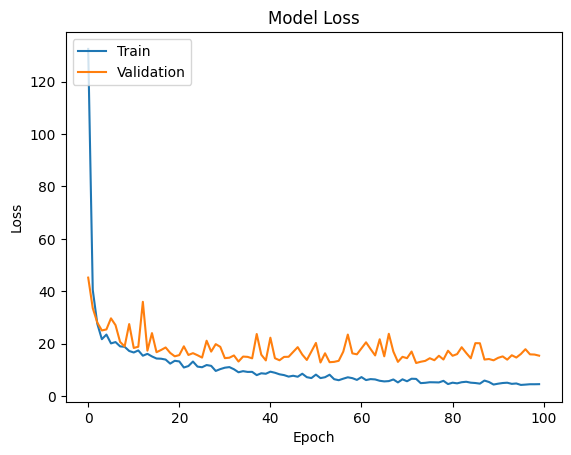

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
